In [71]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from numpy import argmax

In [55]:
# load the MNIST dataset for DL tranining
# . X is the input; y is the expected result
# . two sets -- one for traning; one for validation

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
print("the shapes of the datasets")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)

the shapes of the datasets
X_train: (60000, 28, 28)
y_train: (60000,)
X_valid: (10000, 28, 28)
y_valid: (10000,)


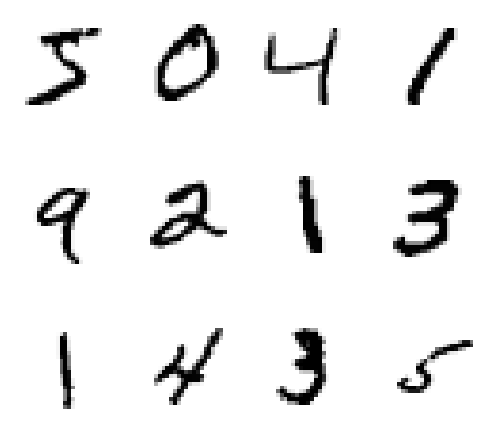

the first 12 traninig digits: [5 0 4 1 9 2 1 3 1 4 3 5]


In [56]:
# show the first 12 training digits

plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()
print("the first 12 traninig digits:", y_train[0:12])

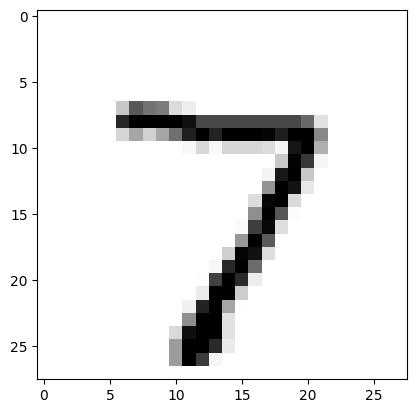

In [57]:
# shoe the first one for validation
plt.imshow(X_valid[0], cmap='Greys')

In [58]:
# save the original valiation dataset for later use
ORI_X_valid = X_valid
ORI_y_valid = y_valid

In [59]:
# adjust the traning and validation input

X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_valid = X_valid.reshape(10000, 784).astype('float32') / 255
print("X_train:", X_train)
print("X_valid:", X_valid)

X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_valid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
# adjust the traning and validation output

n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(ORI_y_valid[0], "==>", y_valid[0])  # show the "categorization" for first one

7 ==> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [61]:
# build the DL traning model

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Flatten the images to 1D (28x28 = 784)
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Choose a sample from the test set
sample_index = 0  # Change this index to get different samples
sample_input = x_test[sample_index]

# Print the sample input in a format suitable for Arduino
print("float x_test[784] = {")
for i in range(len(sample_input)):
    if i % 8 == 0 and i != 0:  # Print 8 values per line for readability
        print()
    print(f"{sample_input[i]:.6f}f,", end=" ")
print("\n};")

# Print the expected class
print(f"Expected class: {y_test[sample_index]}")

float x_test[784] = {
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 
0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 0.000000f, 

In [62]:
# compile the DL traning model
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

In [63]:
# training (fitting) the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.5008 - accuracy: 0.8547 - val_loss: 0.2613 - val_accuracy: 0.9244
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2348 - accuracy: 0.9322 - val_loss: 0.1958 - val_accuracy: 0.9440
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1805 - accuracy: 0.9477 - val_loss: 0.1559 - val_accuracy: 0.9556
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1474 - accuracy: 0.9570 - val_loss: 0.1381 - val_accuracy: 0.9603
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1248 - accuracy: 0.9636 - val_loss: 0.1238 - val_accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.1156 - val_accuracy: 0.9675
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0969 - accuracy: 0.9713 - val_loss: 0.1107 - val_accuracy: 0.9705
Epoch

In [69]:
from tinymlgen import port
c_code = port(model, variable_name='son_mnist', pretty_print=True)
print(c_code)


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char son_mnist[] DATA_ALIGN_ATTRIBUTE = {
	0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00, 
	0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 
	0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 
	0x1c, 0x00, 0x00, 0x00, 0x94, 0x00, 0x00, 0x00, 0xec, 0x00, 0x00, 0x00, 
	0x2c, 0xe2, 0x00, 0x00, 0x3c, 0xe2, 0x00, 0x00, 0x80, 0xe8, 0x00, 0x00, 
	0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 
	0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 
	0x0a, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 
	0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 

In [64]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_valid, axis=1)

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [50]:
# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Save the quantized model
with open('mnist_model_quantized.tflite', 'wb') as f:
    f.write(tflite_quant_model)

In [51]:
# Load the MNIST dataset
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# Preprocess the data
X_valid = X_valid.reshape(10000, 784).astype('float32') / 255

# Select a couple of samples for digits 0 and 1
digit_0 = X_valid[np.where(y_valid == 0)][0]  # First sample of digit 0
digit_1 = X_valid[np.where(y_valid == 1)][0]  # First sample of digit 1
digit_2 = X_valid[np.where(y_valid == 2)][0]  # First sample of digit 2
digit_3 = X_valid[np.where(y_valid == 3)][0]  # First sample of digit 3
digit_4 = X_valid[np.where(y_valid == 4)][0]  # First sample of digit 4
digit_5 = X_valid[np.where(y_valid == 5)][0]  # First sample of digit 5
digit_6 = X_valid[np.where(y_valid == 6)][0]  # First sample of digit 6
digit_7 = X_valid[np.where(y_valid == 7)][0]  # First sample of digit 7
digit_8 = X_valid[np.where(y_valid == 8)][0]  # First sample of digit 8
digit_9 = X_valid[np.where(y_valid == 9)][0]  # First sample of digit 9

# Print the arrays for use in Arduino code
print("Digit 0 sample:")
print(digit_0)
print("\nDigit 1 sample:")
print(digit_1)
print("Digit 2 sample:")
print(digit_2)
print("\nDigit 3 sample:")
print(digit_3)
print("Digit 4 sample:")
print(digit_4)
print("\nDigit 5 sample:")
print(digit_5)
print("Digit 6 sample:")
print(digit_6)
print("\nDigit 7 sample:")
print(digit_7)
print("Digit 8 sample:")
print(digit_8)
print("\nDigit 9 sample:")
print(digit_9)

Digit 0 sample:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    